# Imports

In [92]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.stats import multivariate_normal

# Functions

In [97]:
def pdf(x, mean, variance):
    """ One-Diemensional standard gaussian PDF """
    return (np.exp(-(x-mean)**2 / (2*variance))) * (1/(np.sqrt(2 * np.pi * variance)))

def pdf_t(t, variance, mean, y):
    """  p(t|s1,s2,y): The full conditional distribution of the outcome """
    if y==1:
        return np.where((0 < t), pdf(t, mean, variance), 0)  # return 0 if t lower than 0
    else: # y=-1
        return np.where((0 > t), pdf(t, mean, variance), 0)  # return 0 if t higher than 0
        

def plot_function(x,y):
    """ Standard 1D plotting function """
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the data
    ax.plot(x, y, label='PDF')

    # Set labels and title
    ax.set_xlabel('t')
    ax.set_ylabel('p(t)')
    ax.set_title('PDF')
    ax.legend()
    ax.grid(True)

    # Show the plot
    plt.show()
    
    
def prob_from_pdf(mean, variance, lower, upper):
    """ Integrate PDF within range to get probability"""
    return quad(pdf, lower, upper, args=(mean, variance))


def plot_3d_gaussian(mean_vec, variance_mat):
    """ Given a mean vector and covariance matrix generate a 3D plot of the distribution """
    # Create a grid
    x, y = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
    x, y = np.meshgrid(x, y)
    pos = np.dstack((x, y))

    # Create a 3D Gaussian surface
    rv = multivariate_normal(mean_vec.flatten(), variance_mat)
    z = rv.pdf(pos)

    # Create the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Probability Density')

    plt.show()
    

## Variables

In [105]:
# Mean
mu_1 = 1
mu_2 = -1

# Variances
var_1 = 1
var_2 = 4
var_t = 5

# Random Variables
s_1 = 1
s_2 = -1
t = 3

## Q1

p(s1, s2|t, y): the full conditional distribution of the skills

Given that we know the (distribution) outcome of the match. Generate a gaussian representing the skills

Sigma matrix:
 [[0.9 0.4]
 [0.4 2.4]]

Mean vector:
 [[ 1.1]
 [-1.4]]

3D-Plot:


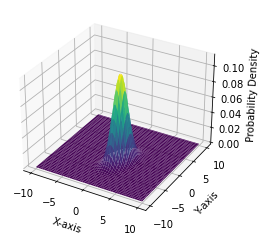

In [106]:
#### Covariance Sigma
S_11 = var_1*(var_2+var_t) / (var_1+var_2+var_t)
S_12 = var_1*var_2 / (var_1+var_2+var_t)
S_21 = S_12
S_22 = var_2*(var_1+var_t) / (var_1+var_2+var_t)

sigma_ab = np.array([[S_11, S_12],[S_21, S_22]])
print(f"Sigma matrix:\n {sigma_ab}")


### Mean Mu
U_1 = (var_1*(t+mu_2) + mu_1*(var_2+var_t)) / (var_1+var_2+var_t)
U_2 = (var_2*(mu_1-t) + mu_2*(var_1+var_t)) / (var_1+var_2+var_t)

mu_ab = np.array([[U_1],[U_2]]) 
print(f"\nMean vector:\n {mu_ab}")



### Plot the 3D gaussian
print("\n3D-Plot:")

plot_3d_gaussian(mu_ab, sigma_ab)

## Q2

p(t | s1, s2, y) = N(s1-s2, var_t): The full conditional distribution of the outcome

Given that we know the outcome and the player skills, generate a guassian of the distribution of the outcome

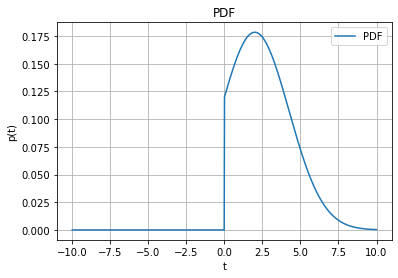

In [107]:
# Define variables
mu_t = s_1-s_2

# Set outcome
y=1

# Define x and y
t = np.linspace(-10,10,1000)
p = pdf_t(t, var_t, mu_t, y)

plot_function(t,p)

## Q3

Probability that player 1 wins is equal:        p(y=1) = p(t>0)

Probability that player 2 wins is equal:        p(y=-1) = p(t<0)   or    1-p(y=1)

In [108]:
# Define mean and variance for p(t)
mean = mu_1 - mu_2
variance = var_1 + var_2 + var_t

# Range
a = 0
b = np.inf

# Integrate
integral_value, _ = prob_from_pdf(mean,variance,a,b)

# Output
print(f"Mean = {mean}")
print(f"Variance = {variance}")
print(f"Probability = {integral_value}")

Mean = 2
Variance = 10
Probability = 0.7364553715672308


## Q4